In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drug = pd.read_csv('drug200.csv')

In [10]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [26]:
drug['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Visualizando os dados

<AxesSubplot:xlabel='Age', ylabel='Count'>

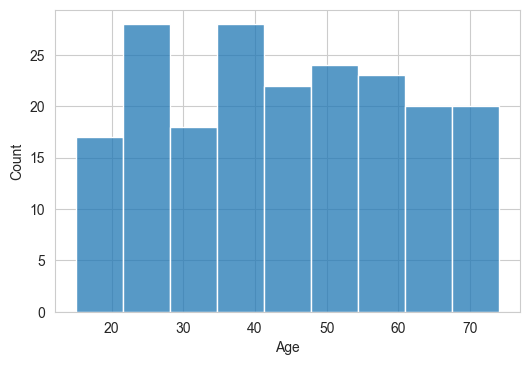

In [40]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
sns.set_style('whitegrid')
sns.histplot(drug['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Count'>

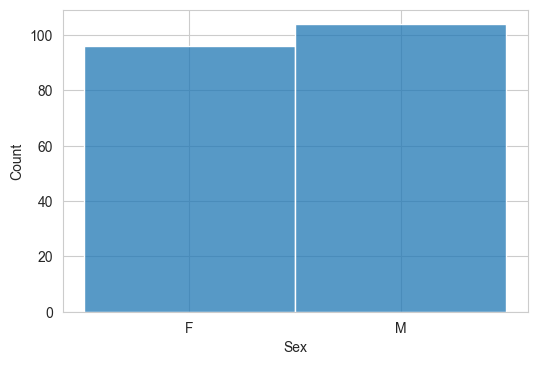

In [41]:
sns.histplot(drug['Sex'])

<AxesSubplot:xlabel='BP', ylabel='Count'>

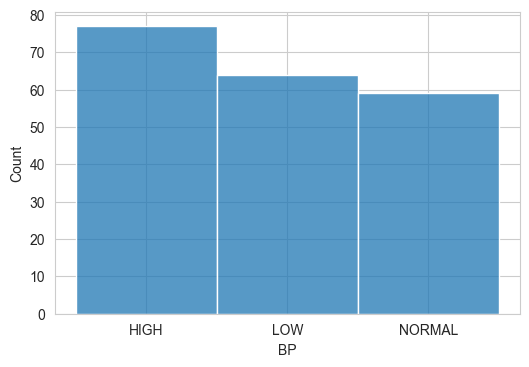

In [42]:
sns.histplot(drug['BP'])

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

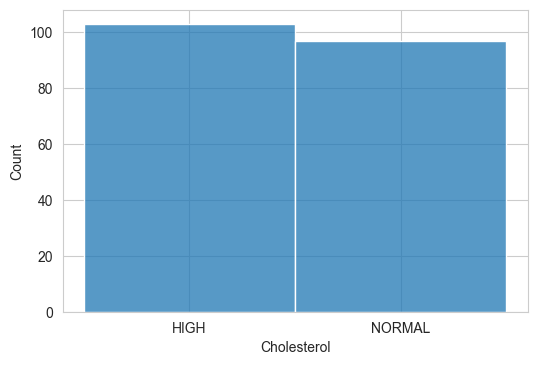

In [43]:
sns.histplot(drug['Cholesterol'])

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

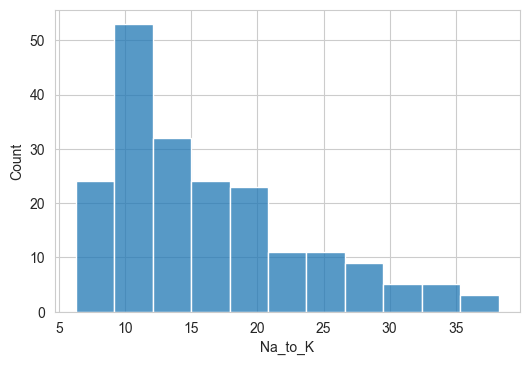

In [44]:
sns.histplot(drug['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='Count'>

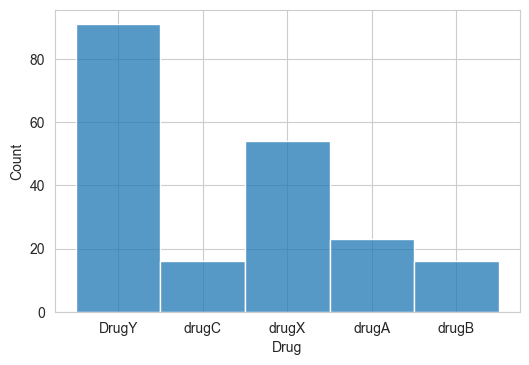

In [51]:
sns.histplot(drug['Drug'])

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(drug, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

160 train + 40 test


In [53]:
y_train, y_test = train_set['Drug'], test_set['Drug']

In [58]:
x_train, x_test = train_set.drop(['Drug'], axis=1), test_set.drop(['Drug'], axis=1)
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,F,LOW,NORMAL,10.840
197,52,M,NORMAL,HIGH,9.894
38,39,F,NORMAL,NORMAL,9.709
24,33,F,LOW,HIGH,33.486
122,34,M,NORMAL,HIGH,22.456


In [63]:
y_train_drugx = (y_train == 'drugX')
y_test_drugx = (y_test == 'drugX')

In [62]:
y_train_drugx

79      True
197     True
38      True
24     False
122    False
       ...  
106     True
14      True
92     False
179    False
102    False
Name: Drug, Length: 160, dtype: bool

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42) #Criando o objeto do algoritmo
forest.fit(x_train, y_train_drugx) # realizando o treinamento


ValueError: could not convert string to float: 'F'